In [1]:
import numpy as np
from PIL import Image
from skimage.transform import resize
import matplotlib.pyplot as plt
!pip install tensorflow
import tensorflow as tf
import os

data_train = np.load('data_train.npy')
print(data_train.shape)

(270000, 3124)


In [2]:
im = Image.fromarray(data_train[:,0].reshape(300,300,3))
im.show()

In [3]:
def visualize(original, augmented):
    fig = plt.figure()
    plt.subplot(1,2,1)
    plt.title("Original image")
    plt.imshow(original)
    
    plt.subplot(1,2,2)
    plt.title("Augmented image")
    plt.imshow(augmented)


In [4]:
'''
tf.image.stateless_random_brightness
tf.image.stateless_random_contrast
tf.image.stateless_random_crop
tf.image.stateless_random_flip_left_right
tf.image.stateless_random_hue
tf.image.stateless_random_jpeg_quality
tf.image.stateless_random_saturation
'''

image = data_train[:,0].reshape(300,300,3)

In [ ]:
# augment data, save files to folder

import time
import sys

os.makedirs("augmented_data")

#tf.enable_eager_execution()
array_size = data_train.shape[1]
augmented_data = np.array([])
test = []
for i in range(array_size):
    count = 0
    image = data_train[:,i].reshape(300,300,3)
    for a in range(3):
        seed = (a, 0)
        augmented_1 = tf.image.stateless_random_brightness(image, max_delta=0.2, seed=seed)
        for b in range(3):
            seed = (b, 0)
            factor = 0.5
            if b != 0:
                augmented_2 = tf.image.resize(tf.image.stateless_random_crop(augmented_1, size = (int(factor*image.shape[0]), int(factor*image.shape[1]), image.shape[2]), seed=seed), (image.shape[0], image.shape[1]))
            else:
                augmented_2 = augmented_1
            for c in range(2):
                if c == 0:
                    augmented_3 = tf.image.flip_left_right(augmented_2)
                else:
                    augmented_3 = augmented_2
                for d in range(2):
                    seed = (d, 0)
                    augmented_4 = tf.image.stateless_random_jpeg_quality(augmented_3, 80, 100, seed=seed)
                    for e in range(3):
                        seed = (e, 0)
                        augmented_5 = tf.image.stateless_random_saturation(augmented_4, 0.8, 1.6, seed=seed)
                        np.save(os.path.join("augmented_data", "" + str(i + 1) + "_" + str(count + 1)), tf.reshape(augmented_5, (image.shape[0]*image.shape[1]*image.shape[2],1)))
                        #print(str(count + 1) + "\t" + str(a) + "\t" + str(b) + "\t" + str(c) + "\t" + str(d) + "\t" + str(e))
                        count += 1

In [5]:
print(data_train.shape)

(270000, 3124)


<class 'numpy.ndarray'>
(270000, 3125)


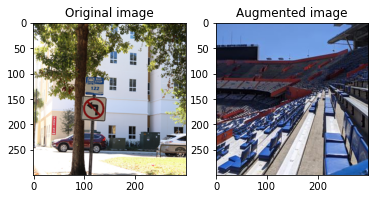

In [6]:
print(type(image))
temp = np.column_stack((data_train, image.reshape(image.shape[0]*image.shape[1]*image.shape[2],1)))
print(temp.shape)
visualize(temp[:,3123].reshape(300,300,3), temp[:,3124].reshape(300,300,3))

In [7]:
# add labels to augmented data

labels_train = np.load('labels_train.npy')
print(labels_train.shape)
print(labels_train[0])
print(np.unique(labels_train))

#tf.enable_eager_execution()
array_size = data_train.shape[1]
augmented_data_labels = np.array([])
test = []
count_1 = 0
for i in range(array_size):
    count = 0
    image = data_train[:,i].reshape(300,300,3)
    for a in range(3):
        for b in range(3):
            for c in range(2):
                for d in range(2):
                    for e in range(3):
                        count += 1
                        augmented_data_labels = np.append(augmented_data_labels, [labels_train[i]])
    if i == 0:
        print(count)
    count_1 += 1
print(count_1)
print(augmented_data_labels.shape)


(3124,)
1.0
[ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10.]
108
3124
(337392,)


In [8]:
labels_train = np.load('labels_train.npy')
print(labels_train.shape)
print(np.unique(labels_train))

(3124,)
[ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10.]


In [9]:
print(labels_train.shape)
print(augmented_data_labels.shape)
augmented_labels_train = np.append(labels_train, augmented_data_labels)
#augmented_data_train = np.column_stack((data_trainaugmented_data_train, ))
print(augmented_labels_train.shape)
np.save("augmented_labels_train.npy", augmented_labels_train)

(3124,)
(337392,)
(340516,)


(270000, 1)
(270000, 1)
(270000, 2)
(270000,)


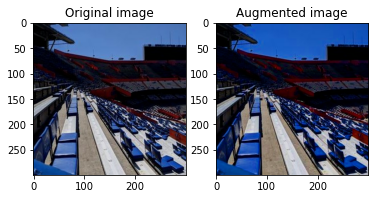

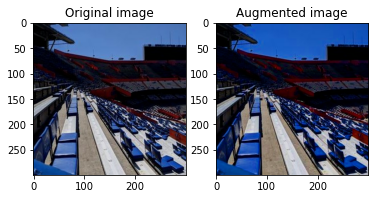

In [10]:
temp_1 = np.load('augmented_data/1_1.npy')
temp_2 = np.load('augmented_data/1_2.npy')
print(temp_1.shape)
print(temp_2.shape)
temp_m = np.column_stack((temp_1, temp_2))
print(temp_m.shape)
visualize(Image.fromarray(temp_m[:,0].reshape(300,300,3)), Image.fromarray(temp_m[:,1].reshape(300,300,3)))
temp_3 = np.load('augmented_data_merged_per_img/1.npy')
print(temp_3[:,0].shape)
visualize(Image.fromarray(temp_3[:,0].reshape(300,300,3).astype(np.uint8)), Image.fromarray(temp_3[:,1].reshape(300,300,3).astype(np.uint8)))

In [ ]:
os.makedirs("augmented_data_merged_per_img")

print(labels_train.shape[0])
print(count)
for img_num in range(labels_train.shape[0]):
    aug_per_img = []
    for aug_num in range(count):
        to_add = np.load("augmented_data/" + str(img_num + 1) + "_" + str(aug_num + 1) + ".npy")
        aug_per_img.append(to_add)
    mer_per_img = np.concatenate(aug_per_img, axis = 1)
    print(img_num)
    np.save(os.path.join("augmented_data_merged_per_img", "" + str(img_num + 1)), mer_per_img)
#merged_npy = np.column_stack((merged_npy, merged_npy))

In [ ]:
!pip install natsort
import natsort

os.makedirs("augmented_data_merged_per_img_inc")

filelist = next(os.walk("augmented_data_merged_per_img/"))[2]
filelist = natsort.natsorted(filelist)
inc = 10
for r in range(0, len(filelist), inc):
    filelist_batch = filelist[r:(r + 10)]
    batch_npy = [np.load("augmented_data_merged_per_img/" + e).tolist() for e in filelist_batch]
    np.save(os.path.join("augmented_data_merged_per_img_inc", "" + str(r) + "_" + str(r + 10)), batch_npy)
    print(r)
print(len(filelist))
#all_npy = [np.load("augmented_data_merged_per_img/" + e).tolist() for e in filelist]
#print(len(all_npy))

0
10
20
30
40
50
60
70
